In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

data = pd.read_csv("HistoryViewsIE.csv",index_col=0)

data['day'] = pd.to_datetime(data['day'], format='%Y%m%d')

data = data.drop(columns = ['month'])

display(data.head())

,day,Fascism,Communism,World_War_I,World_War_II,American_Civil_War,American_Revolution,French_Revolution,Revolutions_of_1848,Colonialism,...,Gothic_architecture,Neoclassical_architecture,Romanesque_architecture,Impressionism,Neoclassicism,Baroque,Collectivism,Luddite,Industrial_Revolution,Mercantilism
0,2015-07-01,7569,4432,21998,23663,25391,4336,7651,623,1244,...,1407,581,633,3141,909,1804,417,1263,4422,1037
1,2015-07-02,7983,4903,20180,23246,27744,5496,7263,818,1547,...,1521,595,749,2796,940,1840,424,1223,4441,895
2,2015-07-03,5765,4025,18156,21267,26481,6366,6856,666,1025,...,1183,454,538,2153,693,1394,318,1074,3222,798
3,2015-07-04,5836,4031,18000,21283,32089,16950,7684,552,1150,...,1235,497,653,2122,663,1385,334,879,2900,810
4,2015-07-05,5463,4517,21316,25838,30285,11905,8394,632,1219,...,1342,598,709,2853,823,1580,403,919,3775,877


In [2]:
ie = pd.DataFrame(data.drop(columns = ['day']).mean(), columns = ['Mean_Daily_Views'])
ie['Standard_Deviation'] = data.drop(columns = ['day']).std()
ie['Coef_Var'] = ie['Standard_Deviation']/ie['Mean_Daily_Views']
ie['Median'] = data.drop(columns = ['day']).median()
display(ie.head())

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median
Fascism,10715.809764,7009.736891,0.654149,8765.0
Communism,6867.786195,1721.533250,0.250668,6819.5
World_War_I,24546.585017,5953.815509,0.242552,23554.0
World_War_II,27106.873737,5013.920195,0.184969,26640.5
American_Civil_War,14269.409933,6329.847553,0.443596,13195.5


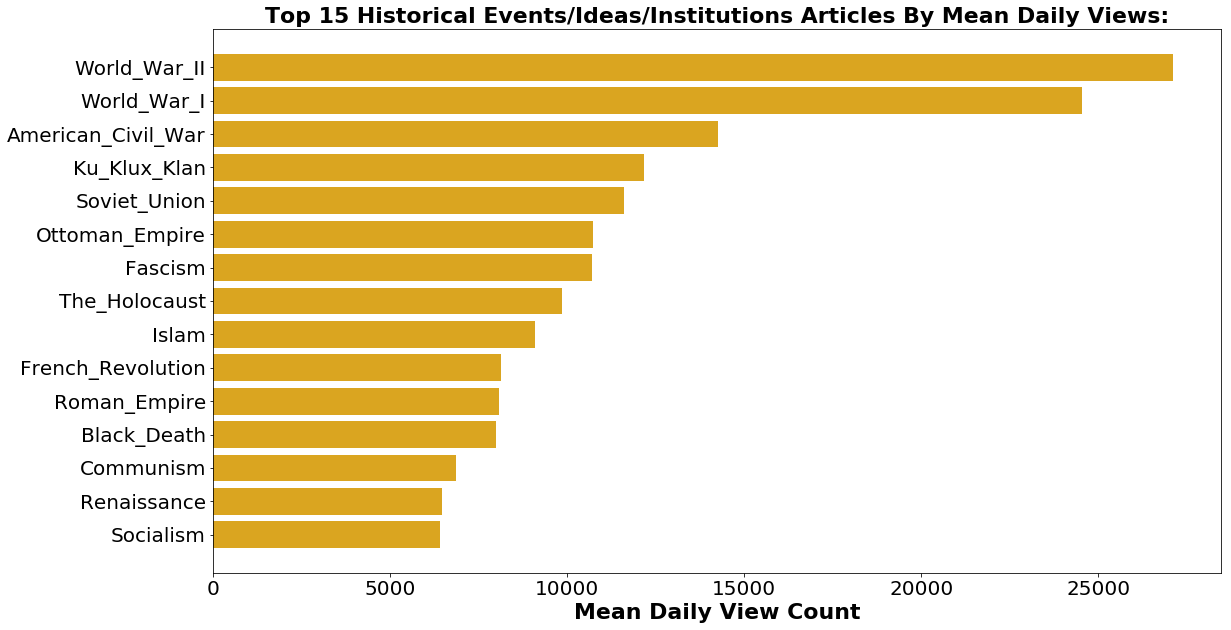

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

top_means = ie.sort_values(by=['Mean_Daily_Views'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_means.index.values, top_means['Mean_Daily_Views'], color='goldenrod')
plt.title('Top 15 Historical Events/Ideas/Institutions Articles By Mean Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

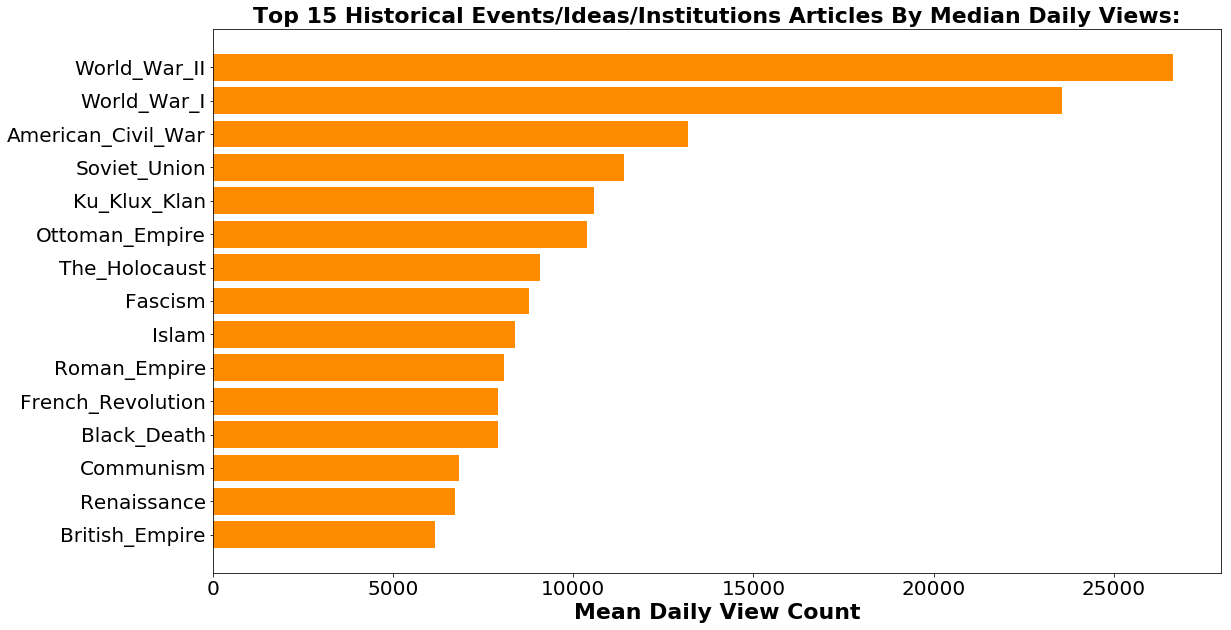

In [4]:
top_medians = ie.sort_values(by=['Median'], ascending=False).head(15)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_medians.index.values, top_medians['Median'], color='darkorange')
plt.title('Top 15 Historical Events/Ideas/Institutions Articles By Median Daily Views:', fontdict=font)
plt.xlabel('Mean Daily View Count',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

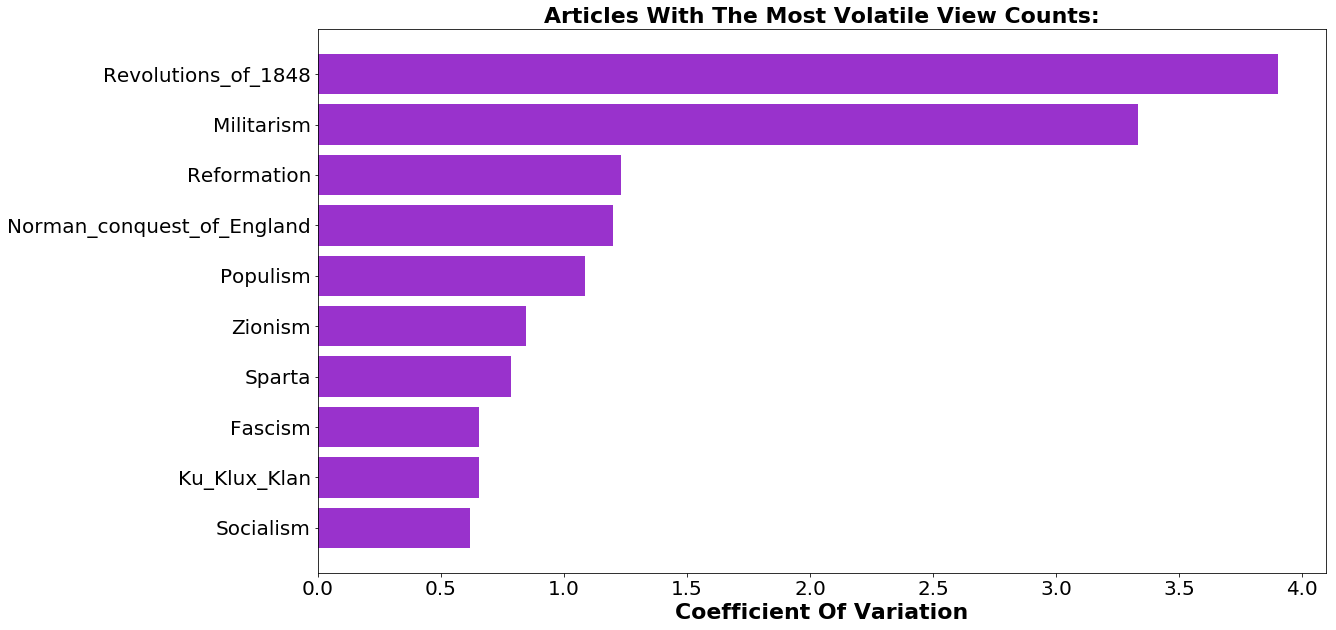

In [5]:
top_cvars = ie.sort_values(by = ['Coef_Var'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(top_cvars.index.values, top_cvars['Coef_Var'], color='darkorchid')
plt.title('Articles With The Most Volatile View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

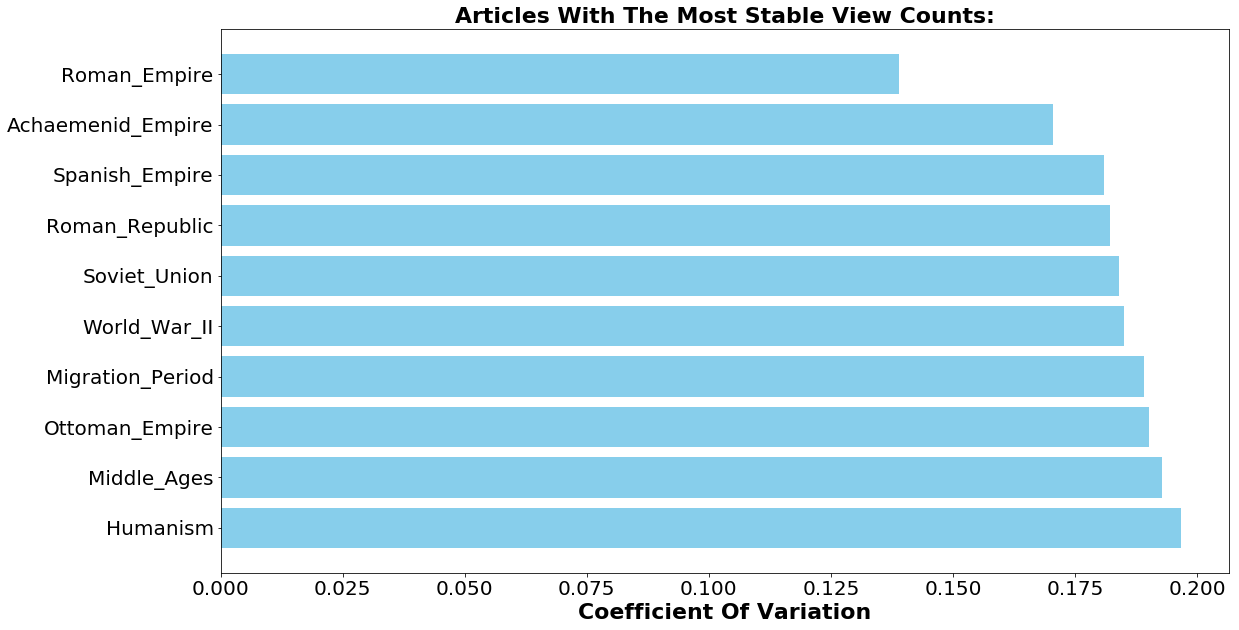

In [6]:
bottom_cvars = ie.sort_values(by = ['Coef_Var'], ascending=True).head(10)

fig, ax = plt.subplots(figsize=(20,10))
plt.barh(bottom_cvars.index.values, bottom_cvars['Coef_Var'], color='skyblue')
plt.title('Articles With The Most Stable View Counts:', fontdict=font)
plt.xlabel('Coefficient Of Variation',fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.gca().invert_yaxis()
plt.gcf().subplots_adjust(left=0.2)
#plt.savefig('PeopleMean.jpeg')
plt.show()

In [7]:
def plot_daily(article):
    years = YearLocator()  
    months = MonthLocator()  
    monthsFmt = DateFormatter('%m')

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    fig, ax = plt.subplots(figsize=(20,5))

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)

    ax.xaxis.set_tick_params(labelsize=20, pad=20)
    ax.xaxis.set_tick_params(which='minor',labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)

    plt.plot(data['day'], data[article])
    plt.title(f'Daily View Count: {article}', fontdict=font)
    plt.ylabel('Daily View Count',fontdict=font)
    plt.gcf().subplots_adjust(bottom=0.15)
    #plt.savefig(f'{article}_Daily_Line.jpeg')
    plt.show()
    
    pass

In [8]:
def bar_top5(article):
    top_days = (data[['day', article]]).sort_values(ascending=False, by=article).head()
    top_days.loc[-1] = ['Mean', data[article].mean()]

    fig, ax = plt.subplots(figsize=(20,5))
    plt.bar(top_days['day'].astype(str).str.slice(0,10), top_days[article], color='firebrick')
    plt.title(f'Top 5 Days: {article}', fontdict=font)
    plt.ylabel('Daily Viewcount',fontdict=font)

    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=15)
    
    #plt.savefig(f'{article}_Top5.jpeg')

    plt.show()

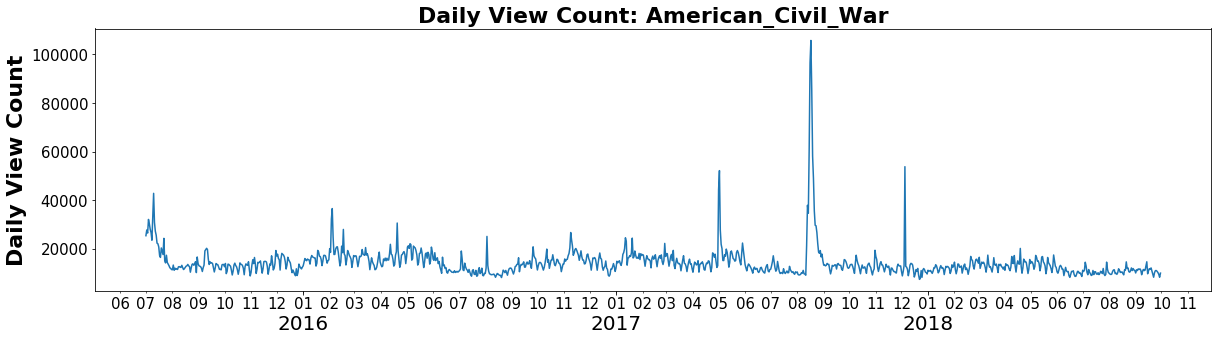

In [9]:
article = 'American_Civil_War'

plot_daily(article)

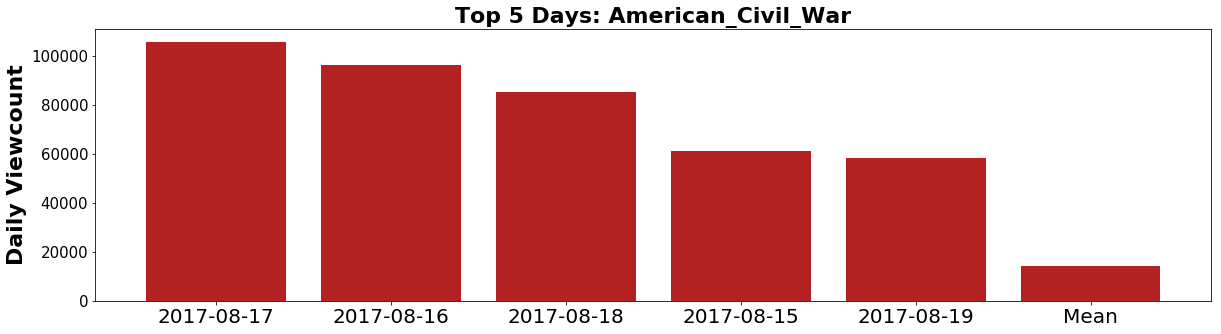

In [10]:
bar_top5(article)

### All of the top 5 dates occur in the week after the notorious 'Unite the Right' Rally in Charlottesville, Virignia, which occurred on August 11-12, 2017. This event, which involved protests of the proposed removal of a statue of Confederate general Robert E. Lee, dominated the news cycle in the week after, which explains why views on the Civil War article were so high. 

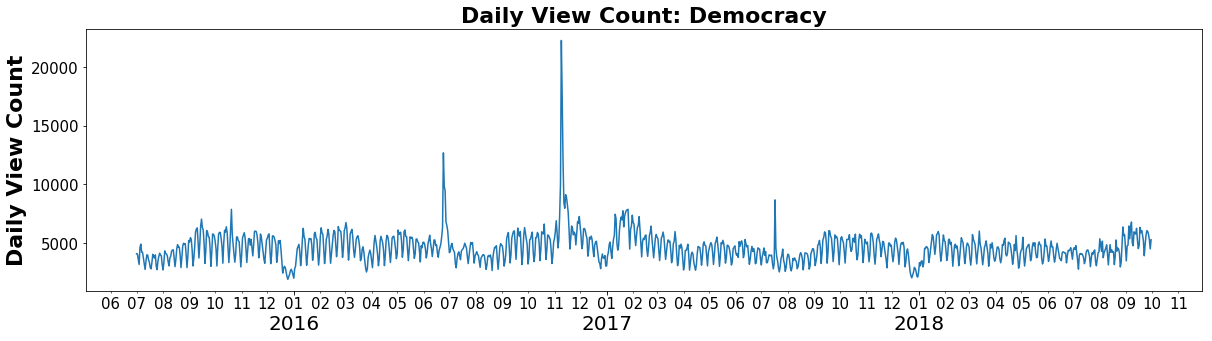

In [11]:
article = 'Democracy'

plot_daily(article)

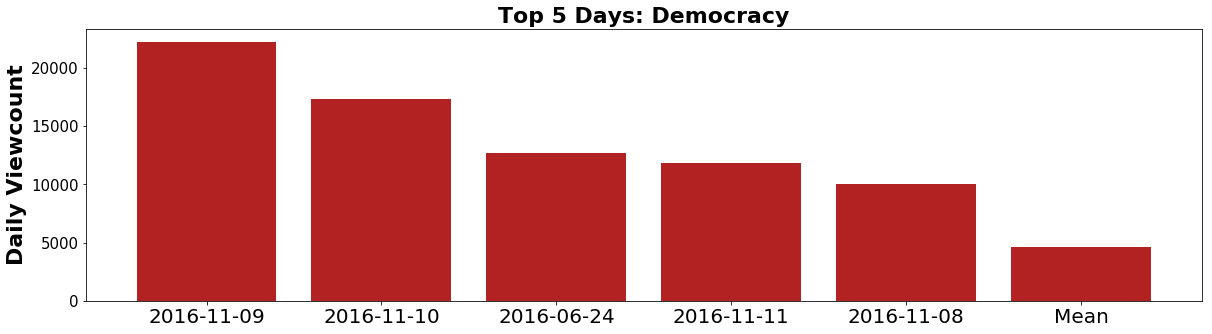

In [12]:
bar_top5(article)

### Four of the top 5 are dates either on or immediately after the November 8, 2016 U.S. presidential election that brought Donald Trump to power. The last one, June 24th, 2016, was the day after the 'Yes' vote in the referendum on Brexit.

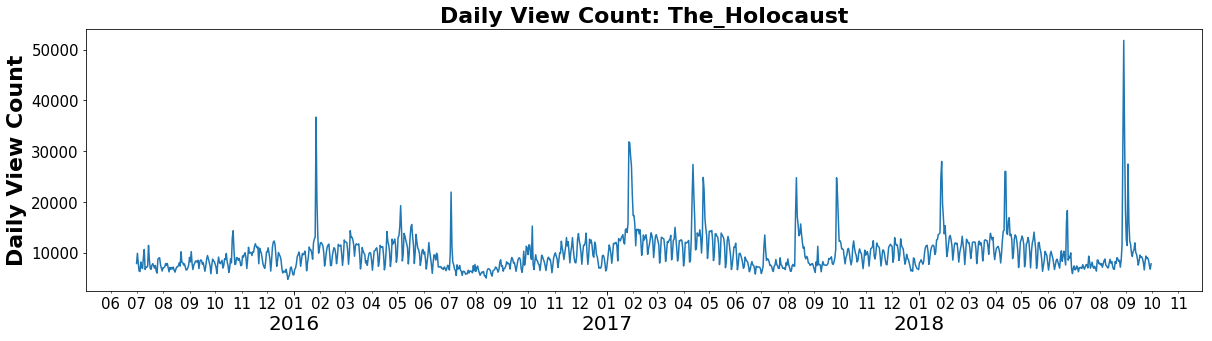

In [13]:
article = 'The_Holocaust'

plot_daily(article)

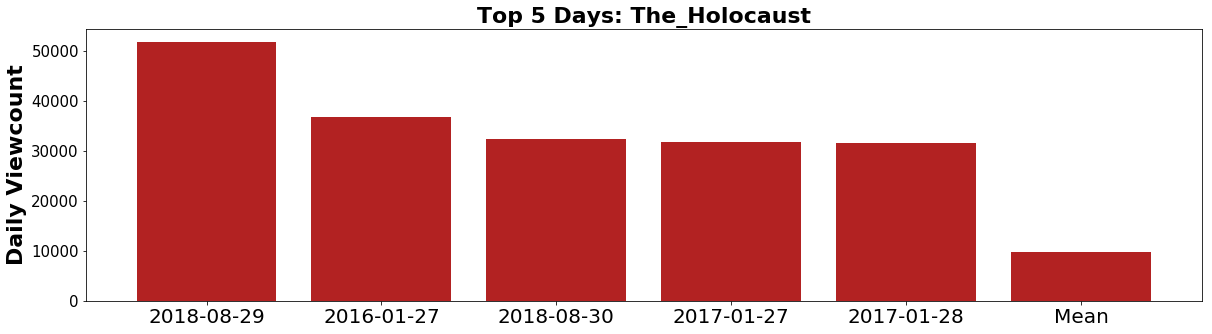

In [14]:
bar_top5(article)

### The Ashkenaz Festival 2018, held in Toronto to celebrate Jewish culture, was opened by a musical performance called Yiddish Glory, which featured Jewish songs written during World War II and the Holocaust. This explains why the two dates after this performance are in the top 5. January 27 is International Holocaust Memorial Day, which explains the other three.  

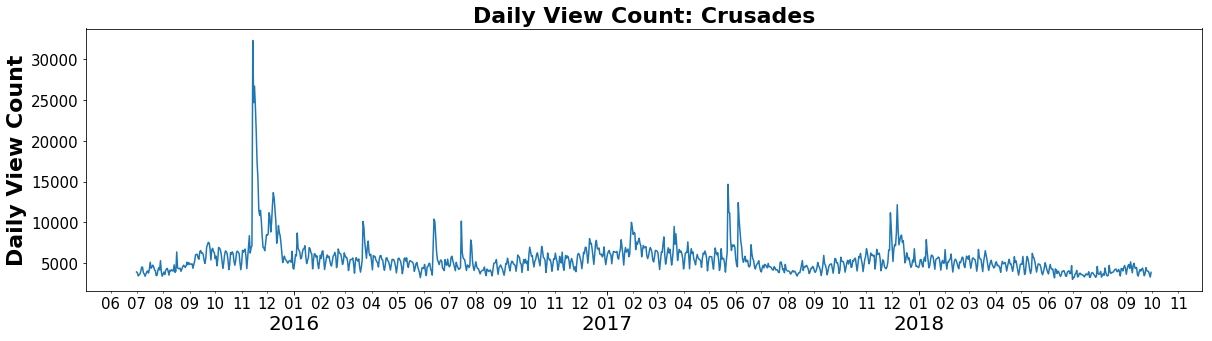

In [15]:
article = 'Crusades'

plot_daily(article)

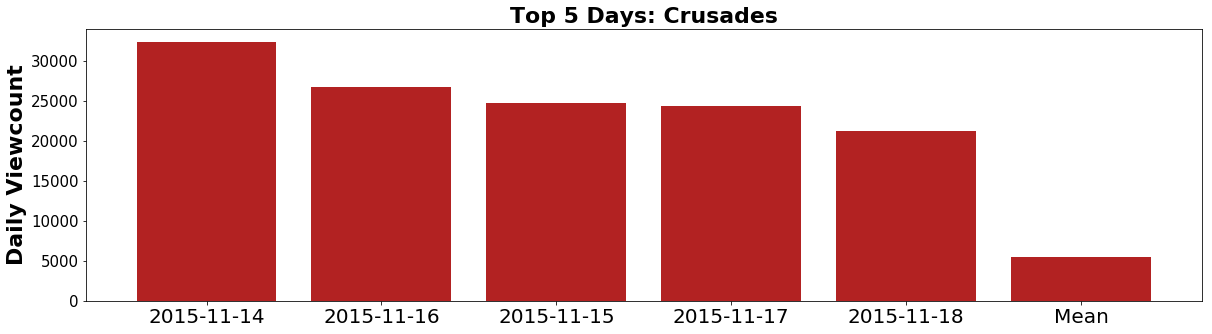

In [16]:
bar_top5(article)

### November 13, 2015 was the date of a large-scale terrorist attack on the city of Paris, France. On the 14th, the Islamic State claimed responsibility for the attack, celebrating their blow against the 'Crusader Nation of France'.

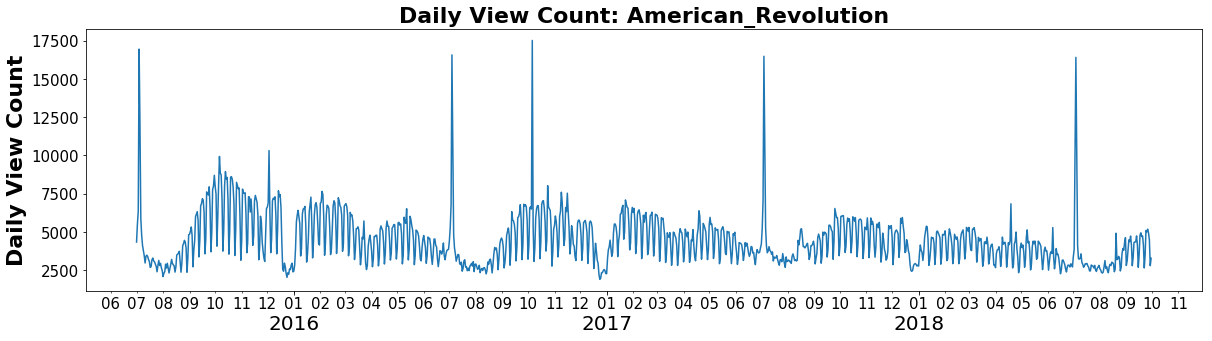

In [17]:
article = 'American_Revolution'

plot_daily(article)

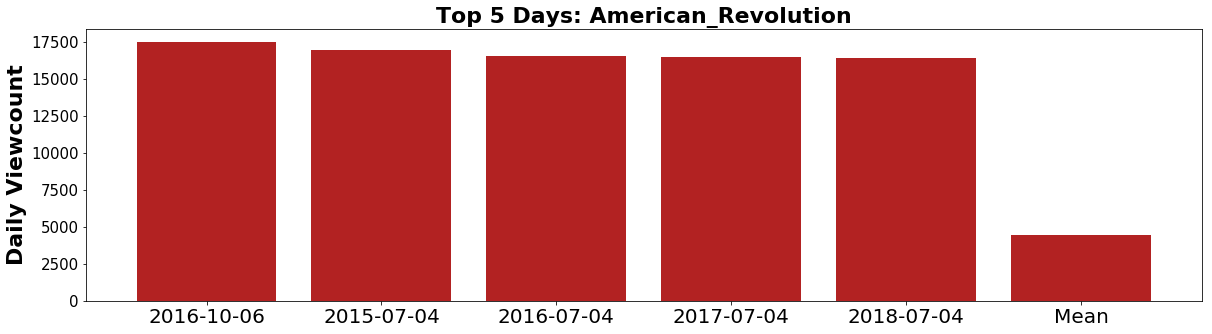

In [18]:
bar_top5(article)

### All four 4ths of July in the dataset are in the top 5, which makes sense. October 6, 2016 is probably there because on this date, CSPAN televised a panel discussion about the history, conservation and future display of George Washington's headquarters tent. 

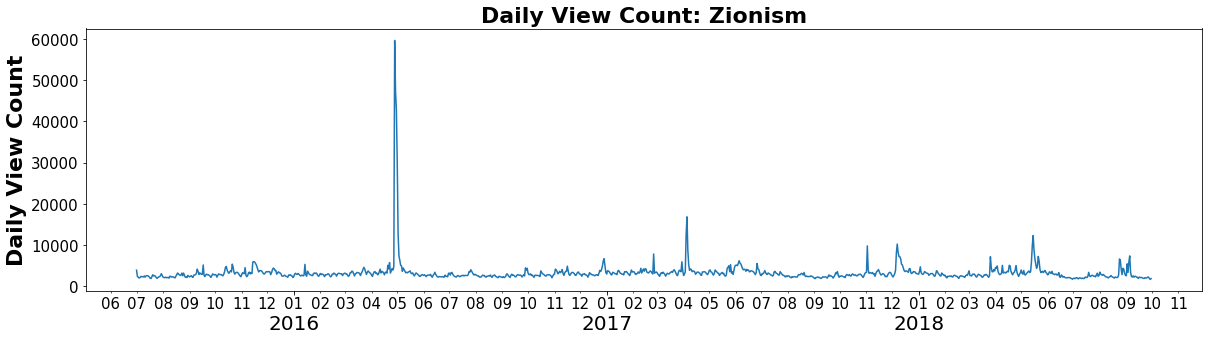

In [19]:
article = 'Zionism'

plot_daily(article)

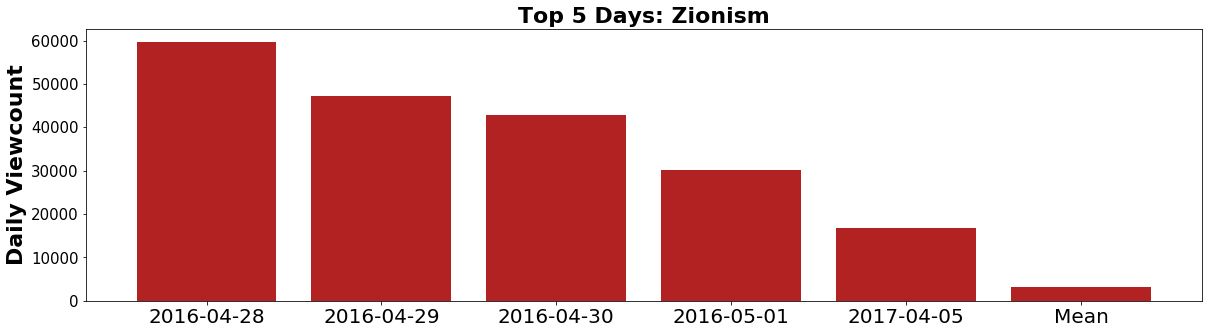

In [20]:
bar_top5(article)

### On March 28, 2016, it was reported in major media outlets that the chief Sephardi rabbi of Israel, Yitzhak Yosef, said that non-Jews shouldn't be allowed to live in Israel. Also in late March, 2016, the University of California put out a controversial statement linking Anti-Semitism to Anti-Zionism. On April 5, 2017, the British Labour Party suspended former mayor Ken Livingstone from the party for stating in an earlier interview that Zionists had collaborated with Nazi Germany in the early 1930s.

In [21]:
data_smooth = data.copy()

for column in data_smooth.columns[1:]:
    sd = data_smooth[column].std()
    avg = data_smooth[column].mean()
    
    mask = data_smooth[column] > (avg + (sd*2))
    
    data_smooth.loc[mask, column] = (avg + (sd*2))

In [22]:
from sklearn.preprocessing import StandardScaler
data_scale = data_smooth.drop(columns = ['day'])

scaler = StandardScaler()
scaler.fit(data_scale)
data_scale = pd.DataFrame(scaler.transform(data_scale), columns = [data_scale.columns])
data_scale = data_scale.T

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
Fascism,-0.574021,-0.482491,-0.972860,-0.957163,-1.039628,-0.966006,-0.953183,-1.072791,-1.057536,-1.116345,...,-1.001601,-0.998064,-0.929527,-0.859885,-0.717285,-0.824511,-0.949204,-1.046481,-1.002264,-0.837555
Communism,-1.592335,-1.277651,-1.864259,-1.860250,-1.535545,-1.335777,-1.435327,-1.482095,-1.407934,-1.266961,...,-0.598175,-1.417288,-1.029111,-0.694384,-0.376360,-0.174588,-0.288836,-0.956954,-1.229547,-0.848051
World_War_I,-0.478866,-0.863500,-1.291717,-1.324722,-0.623156,-0.667586,-0.892273,-0.843401,-0.931414,-0.982190,...,-0.823513,-1.491227,-0.887407,-0.671394,-0.612789,-0.634581,-0.834515,-1.324087,-1.179585,-1.088822
World_War_II,-0.721516,-0.812691,-1.245387,-1.241888,-0.245967,-0.156541,-0.682598,-0.976892,-1.027180,-0.969896,...,-0.903428,-1.721155,-1.283649,0.165084,-0.569340,-0.878503,-1.113545,-1.454410,-1.488737,-1.516505
American_Civil_War,3.100866,3.515456,3.394671,3.515456,3.515456,3.515456,3.449389,2.598702,3.515456,3.515456,...,-1.186533,-1.508910,-1.018067,-0.781406,-0.763076,-0.849601,-0.984374,-1.181681,-1.511067,-1.054995


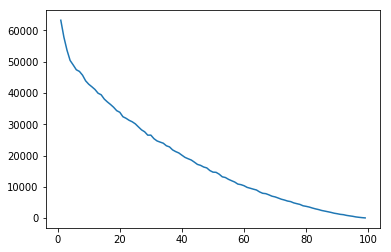

In [23]:
from sklearn.cluster import KMeans

n_clusters = np.arange(1,100)
inertias = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scale)
    
    inertias.append(kmeans.inertia_)
    
plt.plot(n_clusters, inertias)
plt.show()

### No clear 'elbow' here, so used a trial and error method to see which would create the most meaningful clusters. Settled on 60. 

In [24]:
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=60, n_init = 20)
# kmeans.fit(data_scale)

from sklearn.externals import joblib
kmeans = joblib.load('scale_cluster_smooth60IE.pkl')

data_scale['cluster'] = kmeans.predict(data_scale)

data_scale_ri = data_scale.reset_index()

display(data_scale.head())

,0,1,2,3,4,5,6,7,8,9,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,cluster
Fascism,-0.574021,-0.482491,-0.972860,-0.957163,-1.039628,-0.966006,-0.953183,-1.072791,-1.057536,-1.116345,...,-0.998064,-0.929527,-0.859885,-0.717285,-0.824511,-0.949204,-1.046481,-1.002264,-0.837555,57
Communism,-1.592335,-1.277651,-1.864259,-1.860250,-1.535545,-1.335777,-1.435327,-1.482095,-1.407934,-1.266961,...,-1.417288,-1.029111,-0.694384,-0.376360,-0.174588,-0.288836,-0.956954,-1.229547,-0.848051,1
World_War_I,-0.478866,-0.863500,-1.291717,-1.324722,-0.623156,-0.667586,-0.892273,-0.843401,-0.931414,-0.982190,...,-1.491227,-0.887407,-0.671394,-0.612789,-0.634581,-0.834515,-1.324087,-1.179585,-1.088822,38
World_War_II,-0.721516,-0.812691,-1.245387,-1.241888,-0.245967,-0.156541,-0.682598,-0.976892,-1.027180,-0.969896,...,-1.721155,-1.283649,0.165084,-0.569340,-0.878503,-1.113545,-1.454410,-1.488737,-1.516505,38
American_Civil_War,3.100866,3.515456,3.394671,3.515456,3.515456,3.515456,3.449389,2.598702,3.515456,3.515456,...,-1.508910,-1.018067,-0.781406,-0.763076,-0.849601,-0.984374,-1.181681,-1.511067,-1.054995,6


In [25]:
# from sklearn.externals import joblib
# joblib.dump(kmeans, 'scale_cluster_smooth60IE.pkl') 

In [26]:
ie = ie.reset_index()

ie['cluster'] = data_scale_ri['cluster']

ie = ie.set_index('index')

ie = ie.sort_values(by=['Mean_Daily_Views'], ascending=False)

ie['Highest_Daily_Views'] = data.drop(columns = ['day']).max()

for c in range(0,60):
    if(len(ie[ie['cluster']==c])>1):
        display(ie[ie['cluster']==c])

,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Monarchy,1764.072391,425.333510,0.241109,1708.5,0,5152
Age_of_Discovery,1363.365320,381.324424,0.279694,1332.0,0,2585
Dictatorship,1161.648990,312.571400,0.269076,1137.5,0,2962
Aristocracy,791.377946,167.666454,0.211866,771.0,0,3138
Classical_Athens,394.433502,99.450909,0.252136,390.0,0,892


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Communism,6867.786195,1721.533250,0.250668,6819.5,1,24403
Capitalism,3748.097643,995.264152,0.265538,3649.5,1,19922


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Feminism,4762.924242,1230.130294,0.258272,4597.0,2,18387
Russian_Revolution,3261.191919,1241.944599,0.380825,3101.5,2,20324
Imperialism,2058.363636,755.274962,0.366930,1865.5,2,4615
Totalitarianism,1913.448653,511.236908,0.267181,1856.5,2,4550
Reform_Act_1832,562.834175,264.918420,0.470686,534.0,2,6866


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Calvinism,2627.12037,672.705630,0.256062,2585.0,8,11018
European_wars_of_religion,474.37037,162.416973,0.342384,458.0,8,1286


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Liberalism,3891.904882,1135.161648,0.291673,3773.0,9,15253
Nationalism,2663.579966,997.490231,0.374492,2492.0,9,8859


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Socialism,6414.101852,3974.051740,0.619580,5272.0,11,52109
Social_democracy,1651.403199,467.541742,0.283118,1596.5,11,5359


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Industrial_Revolution,6054.313973,1963.449342,0.324306,5765.5,19,12304
Romanticism,4347.426768,1517.227273,0.348994,4155.0,19,19787
Baroque,2285.736532,564.609484,0.247014,2212.5,19,5902
Gothic_architecture,1817.510101,462.203780,0.254306,1750.0,19,9445
Social_Darwinism,1234.048822,504.576118,0.408879,1142.5,19,9058
Individualism,1044.427609,244.285394,0.233894,1032.0,19,2276
Collectivism,597.833333,174.908427,0.292571,586.5,19,4086
Ethical_egoism,497.059764,214.318561,0.431173,469.0,19,5571


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Islam,9095.945286,3428.693563,0.376947,8385.5,21,46752
Crusades,5427.472222,2014.313783,0.371133,5116.0,21,32332


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Roman_Empire,8084.842593,1123.653442,0.138983,8082.0,30,13049
Roman_Republic,2821.051347,513.710128,0.182099,2834.0,30,5966


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
World_War_II,27106.873737,5013.920195,0.184969,26640.5,38,59802
World_War_I,24546.585017,5953.815509,0.242552,23554.0,38,85606


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Middle_Ages,4930.459596,950.446783,0.192770,4891.0,43,9409
Age_of_Enlightenment,4670.146465,1496.771367,0.320498,4521.5,43,8625
Democracy,4623.054714,1292.673395,0.279615,4530.5,43,22245
American_Revolution,4468.879630,1674.262808,0.374649,4192.5,43,17515
Humanism,2422.877104,476.420204,0.196634,2403.5,43,5055
Feudalism,2312.548822,546.255001,0.236213,2260.5,43,4008
Colonialism,1721.071549,473.617885,0.275188,1651.0,43,3901
Mercantilism,1677.804714,644.921198,0.384384,1574.0,43,5361
Absolute_monarchy,1508.929293,394.417594,0.261389,1480.0,43,4382


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Impressionism,2922.714646,732.045809,0.250468,2861.0,47,7259
Neoclassicism,1383.869529,444.577693,0.321257,1312.0,47,4781
Romanesque_architecture,902.125421,223.374982,0.247610,863.5,47,1977
Neoclassical_architecture,785.383838,250.083459,0.318422,754.0,47,6538


,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views
index,,,,,,
Conservatism,1872.278620,467.805305,0.249859,1839.0,53,5579
Authoritarianism,1367.338384,443.285892,0.324196,1307.5,53,4503


In [27]:
ieclust = pd.DataFrame()

for c in range(0,60):
    if(len(ie[ie['cluster']==c]) > 1):
        ieclust = ieclust.append(ie[ie['cluster']==c])

ieclust['cluster'] = ieclust['cluster'].replace(53,3)
ieclust['cluster'] = ieclust['cluster'].replace(47,4)
ieclust['cluster'] = ieclust['cluster'].replace(43,5)
ieclust['cluster'] = ieclust['cluster'].replace(38,6)
ieclust['cluster'] = ieclust['cluster'].replace(30,7)
ieclust['cluster'] = ieclust['cluster'].replace(21,12)
ieclust['cluster'] = ieclust['cluster'].replace(19,10)

ieclust = ieclust.sort_values(ascending=True, by='cluster')

ieclust = ieclust.reset_index()

ieclust['Position'] = ieclust.index.values

color_list = ['orangered','green','blue', 'black', 'orange', 'aqua', 'brown', 'purple', 'turquoise', 'red', 'gray', 'olive', 'navy', 'pink', 'maroon']

ieclust['Color'] = 0

for i in ieclust.index.values:
    ieclust['Color'].loc[i] = color_list[ieclust['cluster'].loc[i]]

ieclust = ieclust.rename(columns = {'index':'Name'})
display(ieclust.head())

,Name,Mean_Daily_Views,Standard_Deviation,Coef_Var,Median,cluster,Highest_Daily_Views,Position,Color
0,Monarchy,1764.072391,425.333510,0.241109,1708.5,0,5152,0,orangered
1,Age_of_Discovery,1363.365320,381.324424,0.279694,1332.0,0,2585,1,orangered
2,Dictatorship,1161.648990,312.571400,0.269076,1137.5,0,2962,2,orangered
3,Aristocracy,791.377946,167.666454,0.211866,771.0,0,3138,3,orangered
4,Classical_Athens,394.433502,99.450909,0.252136,390.0,0,892,4,orangered


In [28]:
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.plotting import figure, show, output_notebook
from bokeh.resources import CDN
from bokeh.embed import file_html

output_notebook()

source = bpl.ColumnDataSource.from_df(ieclust)

hover = bmo.HoverTool(
    tooltips=[
        ('Name', '@Name'),
        ("Mean Daily Views", '@Mean_Daily_Views{int}'),
        ("Median Daily Views", '@Median{int}'),
        ("Standard Deviation", '@Standard_Deviation{int}'),
        ("Highest Daily Views", '@Highest_Daily_Views{int}')
    ]
)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,"

p = figure(tools=[TOOLS,hover],plot_width=800, plot_height=1000)

p.scatter('cluster', 'Position', radius = 0.13, fill_color = 'Color', source=source)

# html = file_html(p, CDN, "IECluster")

# Html_file= open("IEClustering.html","w")
# Html_file.write(html)
# Html_file.close()
show(p)

Loading BokehJS ...